# Presidential Approval Analysis

Data taken from FiveThirtyEight.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv')
data_raw.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,12/13/2019,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,...,45.0,45.850793,43.452945,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:52:00 13 Dec 2019
1,Donald Trump,All polls,12/13/2019,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,...,37.0,44.364202,38.602591,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:52:00 13 Dec 2019
2,Donald Trump,All polls,12/13/2019,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,...,45.2,42.702030,44.099520,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:52:00 13 Dec 2019
3,Donald Trump,All polls,12/13/2019,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,...,46.0,45.850793,44.452945,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:52:00 13 Dec 2019
4,Donald Trump,All polls,12/13/2019,1/21/2017,1/25/2017,Ipsos,B-,1651.0,a,0.138967,...,45.8,42.902030,44.699520,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49425,77598,3/1/2017,11:52:00 13 Dec 2019


In [3]:
data_raw.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [4]:
data_raw.index.unique()

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10484, 10485, 10486, 10487, 10488, 10489, 10490, 10491, 10492,
            10493],
           dtype='int64', length=10494)

In [5]:
data_clean = data_raw

data_clean['start_date_ordinal'] = pd.to_datetime(data_clean['startdate']).apply(lambda date: date.toordinal())
data_clean['end_date_ordinal'] = pd.to_datetime(data_clean['enddate']).apply(lambda date: date.toordinal())
data_clean['model_date_ordinal'] = pd.to_datetime(data_clean['modeldate']).apply(lambda date: date.toordinal())

data_clean.startdate = data_clean.startdate.astype("datetime64")
data_clean.enddate = data_clean.enddate.astype("datetime64")
data_clean.modeldate = data_clean.modeldate.astype("datetime64")

data_clean[['startdate','enddate','modeldate','start_date_ordinal','end_date_ordinal','model_date_ordinal']].head()

,startdate,enddate,modeldate,start_date_ordinal,end_date_ordinal,model_date_ordinal
0,2017-01-20,2017-01-22,2019-12-13,736349,736351,737406
1,2017-01-20,2017-01-22,2019-12-13,736349,736351,737406
2,2017-01-20,2017-01-24,2019-12-13,736349,736353,737406
3,2017-01-21,2017-01-23,2019-12-13,736350,736352,737406
4,2017-01-21,2017-01-25,2019-12-13,736350,736354,737406


In [6]:
#drop polls without a grade

indices = data_clean.index

for i in indices:
    if(data_clean['grade'].isna().loc[i]):
        data_clean.drop(axis = 0,index = i,inplace=True)

/home/alec/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


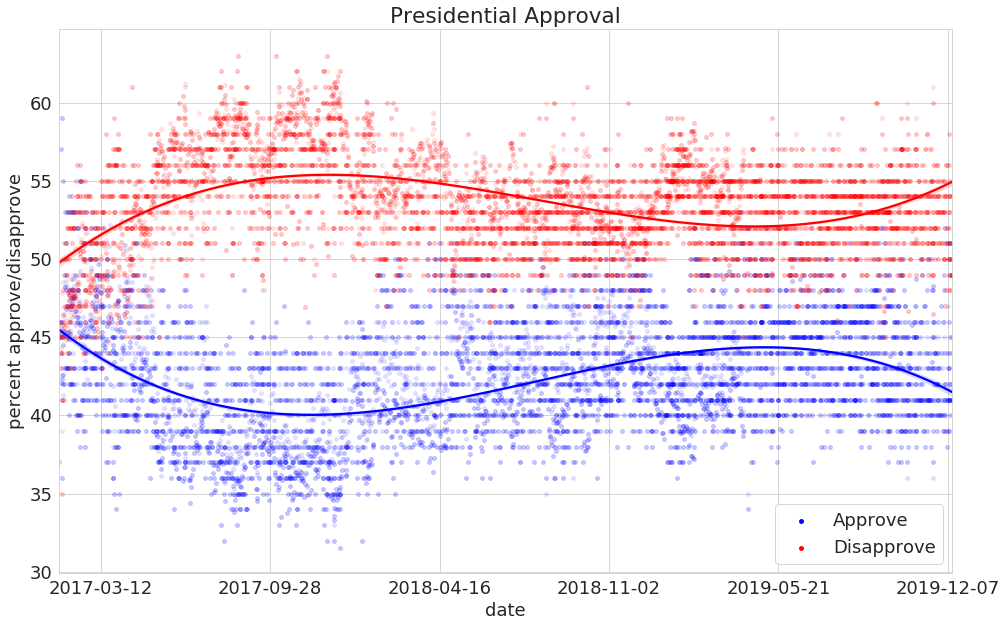

In [7]:
import matplotlib
import warnings
import datetime
warnings.simplefilter('ignore', np.RankWarning)

sns.set_style("whitegrid")

matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(16,10))

deg_order = 20

sns.regplot(x ='end_date_ordinal', y = data_clean['approve'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Approve",color = 'blue')
sns.regplot(x ='end_date_ordinal', y = data_clean['disapprove'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Disapprove",color = 'red')

plt.legend()
plt.xlabel('date')
plt.ylabel('percent approve/disapprove')

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean['enddate'].min(),data_clean['enddate'].max())

plt.title('Presidential Approval')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

## Learning Poll Biases/House-effects

Compare full predictions compared to predictions based only on date

In [8]:
attributes = ['end_date_ordinal','population','grade','poll_id']
cat_attributes = ['population','grade']

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_clean_prep = data_clean[attributes]

for col in cat_attributes:
    data_clean_prep[col] = encoder.fit_transform(data_clean_prep[col])

/home/alec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from sklearn.model_selection import train_test_split

X = data_clean_prep
y_index = data_clean_prep.index
y_approve = data_clean['approve']
y_disapprove= data_clean['disapprove']


X_train, X_valid, y_train_index, y_valid_index = train_test_split(X, y_index,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=42)


In [11]:
y_train_approve = y_approve.loc[y_train_index]
y_train_disapprove = y_disapprove.loc[y_train_index]


y_valid_approve = y_approve.loc[y_valid_index]
y_valid_disapprove = y_disapprove.loc[y_valid_index]


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model_approve = RandomForestRegressor(random_state = 42)
forest_model_disapprove = RandomForestRegressor(random_state = 42)

forest_model_approve.fit(X_train,y_train_approve)
forest_model_disapprove.fit(X_train,y_train_disapprove)


approve_preds = forest_model_approve.predict(X_valid)
disapprove_preds = forest_model_disapprove.predict(X_valid)


print(mean_absolute_error(approve_preds,y_valid_approve))
print(mean_absolute_error(disapprove_preds,y_valid_disapprove))


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7271816846229188
0.7776059419196868


In [13]:
X = X['end_date_ordinal']
X_train = X_train['end_date_ordinal']
X_valid = X_valid['end_date_ordinal']

X_train = np.array(X_train).reshape(-1,1)
X_valid = np.array(X_valid).reshape(-1,1)

In [14]:
forest_model_approve_date = RandomForestRegressor(random_state = 42)
forest_model_disapprove_date = RandomForestRegressor(random_state = 42)

forest_model_approve_date.fit(X_train,y_train_approve)
forest_model_disapprove_date.fit(X_train,y_train_disapprove)


approve_preds_date = forest_model_approve_date.predict(X_valid)
disapprove_preds_date = forest_model_disapprove_date.predict(X_valid)


print(mean_absolute_error(approve_preds_date,y_valid_approve))
print(mean_absolute_error(disapprove_preds_date,y_valid_disapprove))


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


2.6887752107232155
1.8769589034999965


/home/alec/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
X = data_clean_prep

In [16]:
forest_model_approve.fit(X,y_approve)
forest_model_disapprove.fit(X,y_disapprove)

approve_preds = forest_model_approve.predict(X)
disapprove_preds = forest_model_disapprove.predict(X)

In [17]:
X_date = np.array(X['end_date_ordinal']).reshape(-1,1)


forest_model_approve_date.fit(X_date,y_approve)
forest_model_disapprove_date.fit(X_date,y_disapprove)

approve_preds_date = forest_model_approve_date.predict(X_date)
disapprove_preds_date = forest_model_disapprove_date.predict(X_date)

In [18]:
data_clean['approve_bias'] = approve_preds - approve_preds_date
data_clean['disapprove_bias'] = disapprove_preds - disapprove_preds_date
data_clean['net_bias'] = data_clean['approve_bias'] - data_clean['disapprove_bias']

In [19]:
data_clean.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp', 'start_date_ordinal', 'end_date_ordinal',
       'model_date_ordinal', 'approve_bias', 'disapprove_bias', 'net_bias'],
      dtype='object')

In [20]:
for pollster in data_clean.pollster.unique():
    data_pollster = data_clean[data_clean['pollster'] == pollster]
    if data_pollster.pollster.count() > 5:
        print(pollster + ' (poll count: ' + str(data_pollster.pollster.count()) + ')')
        print('\t' + 'Approve bias: ' + '%0.2f' % data_pollster['approve_bias'].mean())
        print('\t' + 'Disapprove bias: ' + '%0.2f' % data_pollster['disapprove_bias'].mean())
        print('\t' + 'Net bias: ' + '%0.2f' % data_pollster['net_bias'].mean())



Gallup (poll count: 816)
	Approve bias: -2.30
	Disapprove bias: 1.43
	Net bias: -3.73
Morning Consult (poll count: 710)
	Approve bias: -0.41
	Disapprove bias: -0.59
	Net bias: 0.18
Ipsos (poll count: 2534)
	Approve bias: -0.97
	Disapprove bias: 0.74
	Net bias: -1.71
Quinnipiac University (poll count: 110)
	Approve bias: -3.07
	Disapprove bias: 1.61
	Net bias: -4.68
Rasmussen Reports/Pulse Opinion Research (poll count: 1462)
	Approve bias: 4.18
	Disapprove bias: -1.38
	Net bias: 5.56
YouGov (poll count: 2152)
	Approve bias: -1.26
	Disapprove bias: -0.78
	Net bias: -0.48
Public Policy Polling (poll count: 70)
	Approve bias: -0.70
	Disapprove bias: -0.29
	Net bias: -0.41
SurveyMonkey (poll count: 446)
	Approve bias: 1.34
	Disapprove bias: 0.60
	Net bias: 0.74
IBD/TIPP (poll count: 68)
	Approve bias: -3.03
	Disapprove bias: 0.92
	Net bias: -3.96
CNN/Opinion Research Corp. (poll count: 6)
	Approve bias: 0.20
	Disapprove bias: 2.92
	Net bias: -2.72
CBS News (poll count: 37)
	Approve bias: -2

In [21]:
data_clean['my_adjusted_approve'] = data_clean['approve'] - data_clean['approve_bias']
data_clean['my_adjusted_disapprove'] = data_clean['disapprove'] - data_clean['disapprove_bias']

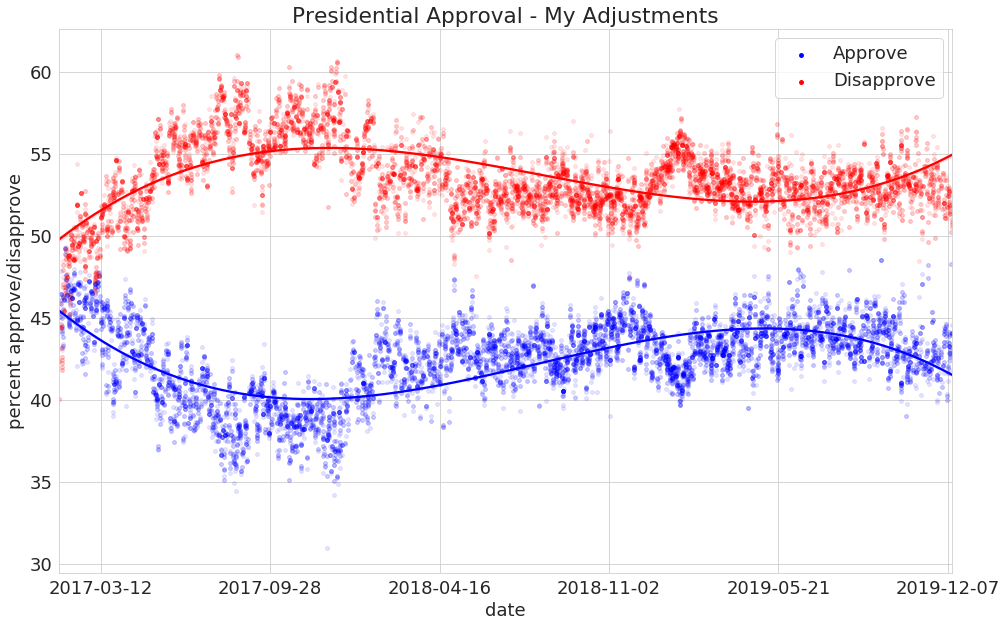

In [23]:
plt.figure(figsize=(16,10))

deg_order = 20

sns.regplot(x ='end_date_ordinal', y = data_clean['my_adjusted_approve'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Approve",color = 'blue')
sns.regplot(x ='end_date_ordinal', y = data_clean['my_adjusted_disapprove'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Disapprove",color = 'red')

plt.legend()
plt.xlabel('date')
plt.ylabel('percent approve/disapprove')

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean['enddate'].min(),data_clean['enddate'].max())

plt.title('Presidential Approval - My Adjustments')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)

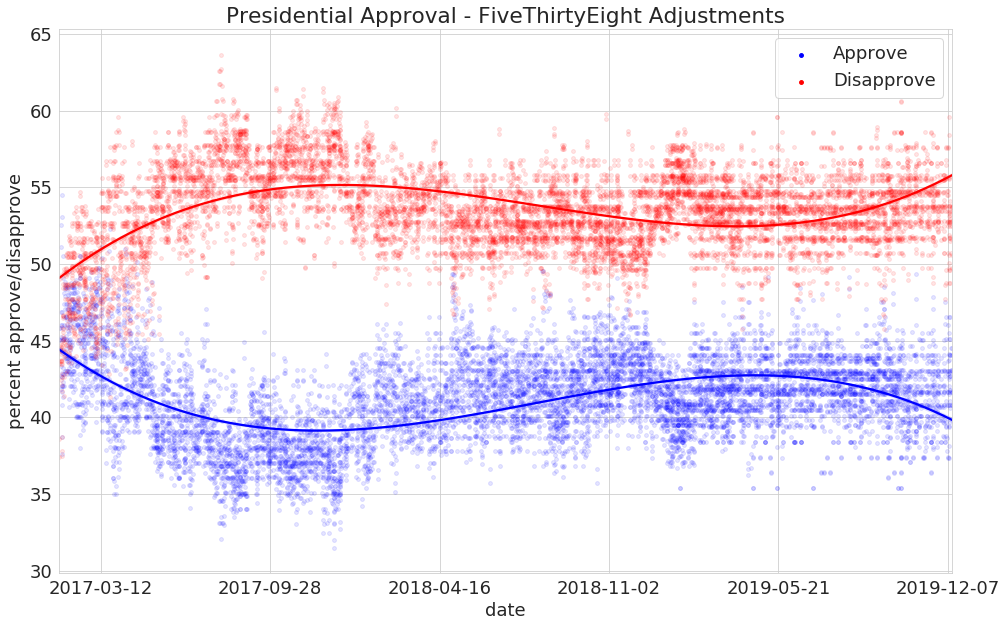

In [24]:
plt.figure(figsize=(16,10))

deg_order = 20

sns.regplot(x ='end_date_ordinal', y = data_clean['adjusted_approve'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Approve",color = 'blue')
sns.regplot(x ='end_date_ordinal', y = data_clean['adjusted_disapprove'], data = data_clean, order = deg_order, truncate = True, scatter_kws={'s':15, 'alpha':0.1}, label = "Disapprove",color = 'red')

plt.legend()
plt.xlabel('date')
plt.ylabel('percent approve/disapprove')

xticks = np.array(plt.xticks())
new_labels = [datetime.date.fromordinal(int(item)) for item in xticks[0]]
plt.xticks(new_labels,new_labels)
plt.xlim(data_clean['enddate'].min(),data_clean['enddate'].max())

plt.title('Presidential Approval - FiveThirtyEight Adjustments')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)